In [42]:
import datetime # Tipo de dato para fechas y horas
import pandas as pd # Manejo de datos tabulados
import numpy as np # Algebra Lineal y operaciones matematicas
import matplotlib.pyplot as plt # Graficos de datos
import seaborn as sns # Graficos estadisticos

In [43]:
df = pd.read_excel("positivos_covid.xlsx")
df

,FECHA_CORTE,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO,UBIGEO,id_persona
0,20220312,CALLAO,CALLAO,CALLAO,PR,25.0,MASCULINO,20200619.0,70101.0,24662494
1,20220312,LIMA,LIMA,CHORRILLOS,PR,37.0,FEMENINO,20200912.0,150108.0,24662689
2,20220312,LIMA,LIMA,SAN MARTIN DE PORRES,PR,25.0,MASCULINO,20201217.0,150135.0,24662153
3,20220312,AREQUIPA,AREQUIPA,AREQUIPA,PCR,27.0,MASCULINO,20220120.0,40101.0,24662155
4,20220312,ICA,PISCO,PISCO,PR,20.0,FEMENINO,20200822.0,110501.0,24662175
...,...,...,...,...,...,...,...,...,...,...
1048570,20220312,UCAYALI,CORONEL PORTILLO,CALLERIA,PCR,35.0,FEMENINO,20220125.0,250101.0,33325863
1048571,20220312,LIMA,LIMA,CARABAYLLO,PCR,36.0,FEMENINO,20210203.0,150106.0,33325872
1048572,20220312,CAJAMARCA,SAN IGNACIO,LA COIPA,PR,45.0,FEMENINO,20200819.0,60904.0,33325874
1048573,20220312,LIMA,LIMA,SAN MARTIN DE PORRES,AG,6.0,MASCULINO,20220120.0,150135.0,33325882


In [7]:
df['EDAD'].argmax()
#numero de fila donde esta el valor maximo de la variable edad

38352

In [8]:
df.loc[38352] #mostrar los datos de la fila

FECHA_CORTE          20220312
DEPARTAMENTO             LIMA
PROVINCIA                LIMA
DISTRITO                 LIMA
METODODX                  PCR
EDAD                   2021.0
SEXO                 FEMENINO
FECHA_RESULTADO    20220215.0
UBIGEO               150101.0
id_persona           25870101
Name: 38352, dtype: object

In [9]:
df.loc[38353]

FECHA_CORTE          20220312
DEPARTAMENTO             LIMA
PROVINCIA                LIMA
DISTRITO           LURIGANCHO
METODODX                   PR
EDAD                     78.0
SEXO                MASCULINO
FECHA_RESULTADO    20210116.0
UBIGEO               150118.0
id_persona           25175744
Name: 38353, dtype: object

<AxesSubplot:>

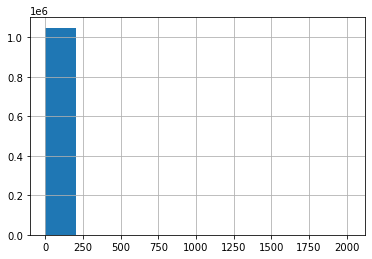

In [10]:
df.drop(38352,axis=0)['EDAD'].hist()
#drop es para eliminar la fila o columna (0= elimina fila, 1 =columna, axis)

<AxesSubplot:>

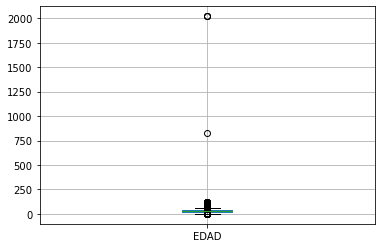

In [11]:
df.boxplot('EDAD')
#para identificar outlayers/ diagrama de cajas

<AxesSubplot:>

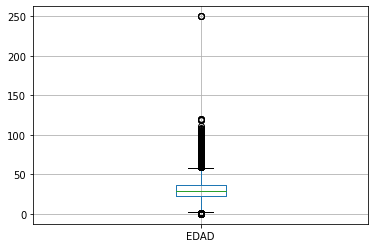

In [12]:
df[['EDAD']].clip(upper=250).boxplot()
#limita los valores a un limite superior e inferior upper/lower

<AxesSubplot:>

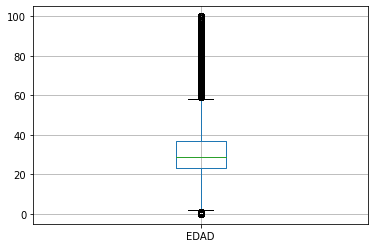

In [13]:
df[['EDAD']].clip(upper=100).boxplot()

In [14]:
df['EDAD-clip']= df['EDAD'].clip(upper=100)
print(df['EDAD-clip'])
#estoy reemplazando todos los valores mayores a 100 por 100

0          25.0
1          37.0
2          25.0
3          27.0
4          20.0
           ... 
1048570    35.0
1048571    36.0
1048572    45.0
1048573     6.0
1048574     6.0
Name: EDAD-clip, Length: 1048575, dtype: float64


In [15]:
df['EDAD-clip'].min()

0.0

In [16]:
df['EDAD-clip'].max()

100.0

In [17]:
# Validar integridad del identificador "único"
len(df['id_persona'].unique()), df.shape[0]

(983800, 1048575)

In [18]:
# Nulos en id_persona
df['id_persona'].isna() #no hay valor nulo, si fuera nulo aparecería true isna.sum() es la agrupación de valores

0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Name: id_persona, Length: 1048575, dtype: bool

In [19]:
# Conteo de cuantas veces se duplican los id_persona
filtro_duplicados = df['id_persona'].duplicated(keep=False)
df[filtro_duplicados]['id_persona'].value_counts().head()

32314110    10
21271473     6
26130233     5
22932885     5
23942780     5
Name: id_persona, dtype: int64

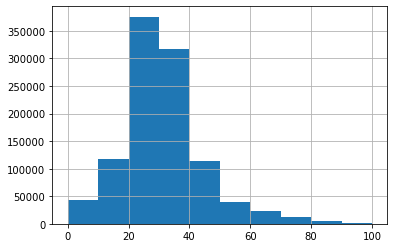

In [20]:
df['EDAD-clip'].hist()
plt.show()

In [21]:
rangos_edad = [0, 5, 11, 18, 25, 35, 50, 65, 75, 90, 100]
edad_bins = pd.cut(df['EDAD-clip'], bins=rangos_edad)

edad_bins_count = edad_bins.value_counts()

In [22]:
edad_bins_count

(25, 35]     391932
(18, 25]     223312
(35, 50]     217668
(11, 18]      80579
(50, 65]      50562
(5, 11]       37083
(0, 5]        18970
(65, 75]      15559
(75, 90]       9352
(90, 100]       871
Name: EDAD-clip, dtype: int64

<AxesSubplot:>

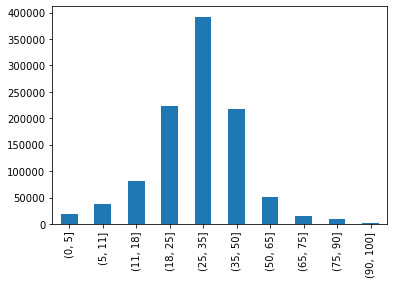

In [23]:
edad_bins_count.sort_index().plot(kind='bar')

In [24]:
df['edad_bins'] = edad_bins

In [25]:
df['SEXO'].describe()

count      1048575
unique           2
top       FEMENINO
freq        540140
Name: SEXO, dtype: object

In [26]:
df['SEXO'].value_counts(), df['SEXO'].value_counts(normalize=True)
#cuando quieres el f=, m=

(FEMENINO     540140
 MASCULINO    508435
 Name: SEXO, dtype: int64,
 FEMENINO     0.515118
 MASCULINO    0.484882
 Name: SEXO, dtype: float64)

In [27]:
# Valores perdidos / missings
df['SEXO'].isna().sum(), df['SEXO'].isna().sum() / df.shape[0]

(0, 0.0)

In [28]:
conteo_edad_x_sexo = (df[['edad_bins', 'SEXO']]
                      .groupby(['edad_bins', 'SEXO']).size() # Agrupo y cuento las obs. por intervalo de edad y sexo 
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_edad_x_sexo.head()

,edad_bins,SEXO,conteo
0,"(0, 5]",FEMENINO,9062
1,"(0, 5]",MASCULINO,9908
2,"(5, 11]",FEMENINO,18024
3,"(5, 11]",MASCULINO,19059
4,"(11, 18]",FEMENINO,43490


In [29]:
conteo_edad_x_sexo.head

<bound method NDFrame.head of     edad_bins       SEXO  conteo
0      (0, 5]   FEMENINO    9062
1      (0, 5]  MASCULINO    9908
2     (5, 11]   FEMENINO   18024
3     (5, 11]  MASCULINO   19059
4    (11, 18]   FEMENINO   43490
5    (11, 18]  MASCULINO   37089
6    (18, 25]   FEMENINO  119605
7    (18, 25]  MASCULINO  103707
8    (25, 35]   FEMENINO  202957
9    (25, 35]  MASCULINO  188975
10   (35, 50]   FEMENINO  106269
11   (35, 50]  MASCULINO  111399
12   (50, 65]   FEMENINO   25749
13   (50, 65]  MASCULINO   24813
14   (65, 75]   FEMENINO    8015
15   (65, 75]  MASCULINO    7544
16   (75, 90]   FEMENINO    5230
17   (75, 90]  MASCULINO    4122
18  (90, 100]   FEMENINO     539
19  (90, 100]  MASCULINO     332>

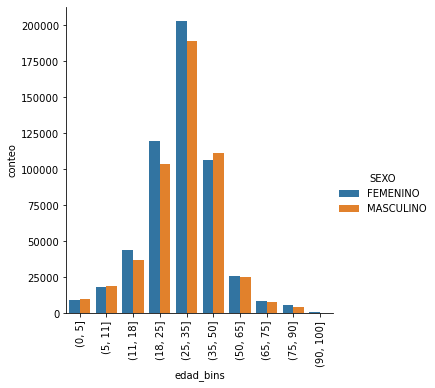

In [30]:
# Gráfica de barras de cantidad de personas por intervalo de edad en cada género
g = sns.catplot(
    data=conteo_edad_x_sexo, kind="bar",
    x="edad_bins", y="conteo", hue="SEXO",
)
g.set_xticklabels(rotation=90)
plt.show()

In [31]:
df.value_counts()

FECHA_CORTE  DEPARTAMENTO  PROVINCIA  DISTRITO                METODODX  EDAD  SEXO       FECHA_RESULTADO  UBIGEO    id_persona  EDAD-clip  edad_bins
20220312     LIMA          LIMA       LIMA                    AG        26.0  MASCULINO  20210206.0       150101.0  24312110    26.0       (25, 35]     4
                                      SAN MARTIN DE PORRES    AG        23.0  MASCULINO  20210522.0       150135.0  28385157    23.0       (18, 25]     4
                                      LIMA                    AG        30.0  MASCULINO  20220105.0       150101.0  23436161    30.0       (25, 35]     4
             JUNIN         HUANCAYO   HUANCAYO                AG        18.0  FEMENINO   20210515.0       120101.0  28312210    18.0       (11, 18]     4
             LIMA          LIMA       SAN JUAN DE MIRAFLORES  AG        33.0  FEMENINO   20210212.0       150133.0  19631944    33.0       (25, 35]     4
                                                                                 

In [32]:
local_vars = ['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO']
df[local_vars].head()

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO
0,70101.0,CALLAO,CALLAO,CALLAO
1,150108.0,LIMA,LIMA,CHORRILLOS
2,150135.0,LIMA,LIMA,SAN MARTIN DE PORRES
3,40101.0,AREQUIPA,AREQUIPA,AREQUIPA
4,110501.0,ICA,PISCO,PISCO


In [33]:
df['UBIGEO'] = df['UBIGEO'].astype(str)

In [34]:
# Conteo de valores nulos para mi dataframe creado local_vars
df[local_vars].isna().sum()

UBIGEO           0
DEPARTAMENTO    83
PROVINCIA        0
DISTRITO         0
dtype: int64

In [35]:
df[local_vars].describe()

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO
count,1048575,1048492,1048575,1048575
unique,1825,25,197,1677
top,nan,LIMA,LIMA,EN INVESTIGACIÃ“N
freq,50625,447077,384593,50625


In [36]:
df['DISTRITO'].isna().sum()

0

In [8]:
import geopandas as gpd 

In [31]:
geo_deps = gpd.read_file('LIMITE_DEPARTAMENTAL (1).zip')
geo_provs = gpd.read_file('LIMITE_PROVINCIAL.zip')
geo_dists = gpd.read_file('LIMITE_DISTRITAL.zip')

<AxesSubplot:>

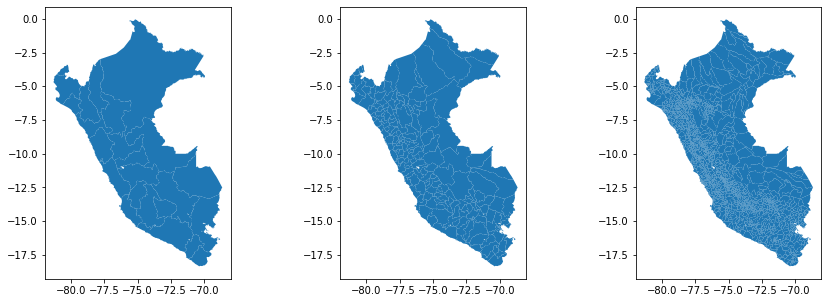

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,
                                    figsize=(15, 5))

geo_deps.plot(ax=ax1)
geo_provs.plot(linewidth=0.5, ax=ax2)
geo_dists.plot(linewidth=0.1, ax=ax3)

In [45]:
df['UBIGEO'] = df['UBIGEO'].astype(str)

In [51]:
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].astype(str)

In [54]:
# VALIDAMOS QUE LOS NOMBRES DE DEPARTAMENTOS
# EN LOS DOS DATASETS SEAN IGUALES
df_unique_dep = df['DEPARTAMENTO'].unique()
df_unique_dep.sort()

gdf_unique_dep = geo_deps['NOMBDEP'].unique()
gdf_unique_dep.sort()

#(df_unique_dep == gdf_unique_dep).all() # True

In [56]:
geo_deps['NOMBDEP'] = geo_deps['NOMBDEP'].astype(str)

In [57]:
(df_unique_dep == gdf_unique_dep).all() # True

C:\Users\LILI\AppData\Local\Temp\ipykernel_19244\2773982609.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  (df_unique_dep == gdf_unique_dep).all() # True


AttributeError: 'bool' object has no attribute 'all'